In [ ]:
!pip install pyspark
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_jan=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-01.parquet")
df_feb=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-02.parquet")
df_mar=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-03.parquet")
df_apr=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-04.parquet")
df_may=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-05.parquet")
df_jun=pd.read_parquet("/content/drive/MyDrive/Project3/yellow_tripdata_2017-06.parquet")

In [ ]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os

# Function to clean a data chunk
def clean_data_chunk(chunk):
    # Convert pickup and dropoff datetime columns to datetime format
    chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
    chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')

    # Remove rows with missing essential data
    chunk = chunk.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount'])

    # Filter out rows where trip distance or fare amount are zero or negative
    chunk = chunk[(chunk['trip_distance'] > 0) & (chunk['fare_amount'] > 0)]

    return chunk

In [ ]:
 #List of dataframes and their corresponding output filenames
dataframes = {
    'df_jan': df_jan, 'df_feb': df_feb, 'df_mar': df_mar,
    'df_april': df_apr, 'df_may': df_may, 'df_june': df_jun
}

for name, df in dataframes.items():
    cleaned_file_path = f'cleaned_{name}.parquet'  # Output file path

    # Remove existing Parquet file if it exists to start fresh
    if os.path.exists(cleaned_file_path):
        os.remove(cleaned_file_path)

    # Split dataframe into chunks and process each chunk
    num_chunks = int(np.ceil(len(df) / 100000))  # Adjust chunk size based on memory capacity
    for i in range(num_chunks):
        # Select chunk of data
        chunk = df.iloc[i*100000 : (i+1)*100000]
        cleaned_chunk = clean_data_chunk(chunk)

        # Convert cleaned chunk to a PyArrow table
        table = pa.Table.from_pandas(cleaned_chunk)

        # Append the cleaned chunk to the Parquet file
        if i == 0:
            # Write the first chunk with schema and metadata
            pq.write_table(table, cleaned_file_path)
        else:
            # Append subsequent chunks to the same Parquet file
            with pq.ParquetWriter(cleaned_file_path, table.schema, use_dictionary=True) as writer:
                writer.write_table(table)

    print(f"Completed cleaning and saving {name} to {cleaned_file_path}")

# Combine all monthly Parquet files into a final combined Parquet file
combined_parquet_files = [f'cleaned_{name}.parquet' for name in dataframes.keys()]
combined_tables = [pq.read_table(file) for file in combined_parquet_files]
final_combined_table = pa.concat_tables(combined_tables)

# Save the final combined table as a single Parquet file
pq.write_table(final_combined_table, 'combined_cleaned_data.parquet')
print("All files combined and saved as 'combined_cleaned_data.parquet'")

<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_jan to cleaned_df_jan.parquet


<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_feb to cleaned_df_feb.parquet


<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_mar to cleaned_df_mar.parquet


<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_april to cleaned_df_april.parquet


<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_may to cleaned_df_may.parquet


<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
<ipython-input-4-edb96f348426>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Completed cleaning and saving df_june to cleaned_df_june.parquet
All files combined and saved as 'combined_cleaned_data.parquet'


Combined Parquet Files

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined Parquet file from Google Drive
file_path = '/content/drive/My Drive/Project3/combined_cleaned_data.parquet'
df = pd.read_parquet(file_path)

# Quick overview of the data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 280454 entries, 9700000 to 9656992
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               280454 non-null  int64         
 1   tpep_pickup_datetime   280454 non-null  datetime64[us]
 2   tpep_dropoff_datetime  280454 non-null  datetime64[us]
 3   passenger_count        280454 non-null  int64         
 4   trip_distance          280454 non-null  float64       
 5   RatecodeID             280454 non-null  int64         
 6   store_and_fwd_flag     280454 non-null  object        
 7   PULocationID           280454 non-null  int64         
 8   DOLocationID           280454 non-null  int64         
 9   payment_type           280454 non-null  int64         
 10  fare_amount            280454 non-null  float64       
 11  extra                  280454 non-null  float64       
 12  mta_tax                280454 non-null  fl

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
9700000,2,2017-01-31 23:56:19,2017-02-01 00:17:51,1,5.90,1,N,50,223,1,20.0,0.5,0.5,0.00,0.00,0.3,21.30,None,None
9700001,2,2017-01-31 23:00:47,2017-01-31 23:05:26,1,0.59,1,N,48,186,1,4.5,0.5,0.5,1.45,0.00,0.3,7.25,None,None
9700002,1,2017-01-31 23:13:47,2017-01-31 23:38:29,1,18.50,2,N,132,263,1,52.0,0.0,0.5,8.00,5.54,0.3,66.34,None,None
9700003,1,2017-01-31 23:26:46,2017-01-31 23:32:36,1,1.30,1,N,236,140,2,7.0,0.5,0.5,0.00,0.00,0.3,8.30,None,None
9700004,2,2017-01-31 23:16:30,2017-01-31 23:30:23,1,4.30,1,N,230,202,2,14.0,0.5,0.5,0.00,0.00,0.3,15.30,None,None


In [ ]:
# Basic statistics
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     280454
airport_fee              280454
dtype: int64


# EDA (Exploratory Data Analysis)

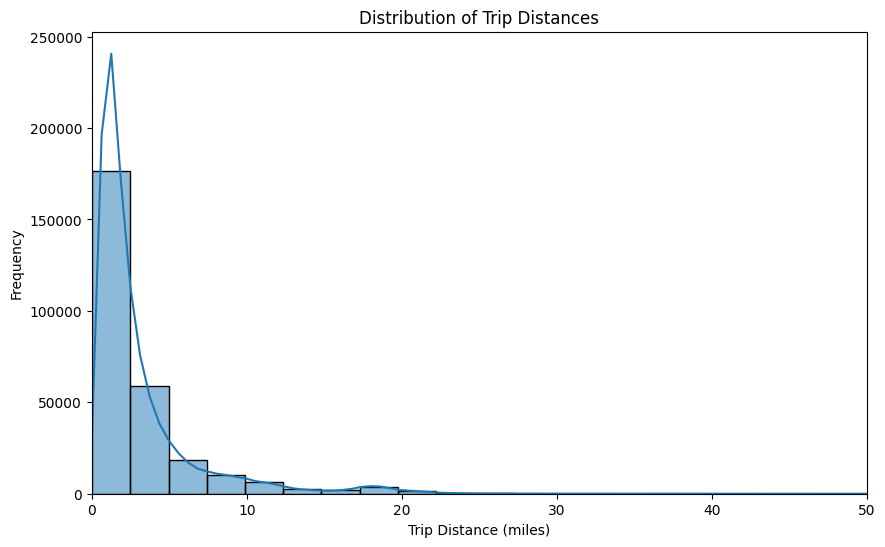

In [ ]:
# Plot distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distances")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 50)  # Limiting x-axis to exclude outliers
plt.show()


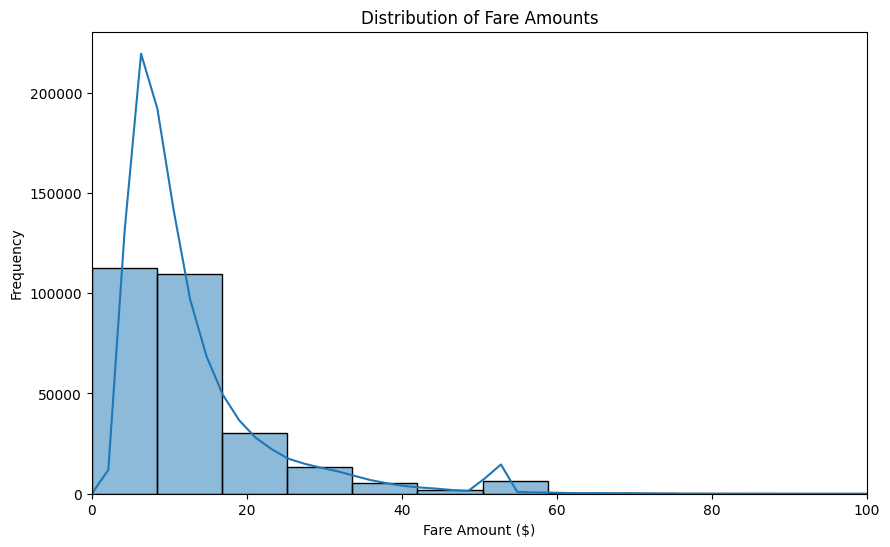

In [ ]:
# Plot distribution of fare amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Limiting x-axis to exclude outliers
plt.show()


<ipython-input-7-b6be46b92b10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=df, palette="viridis")


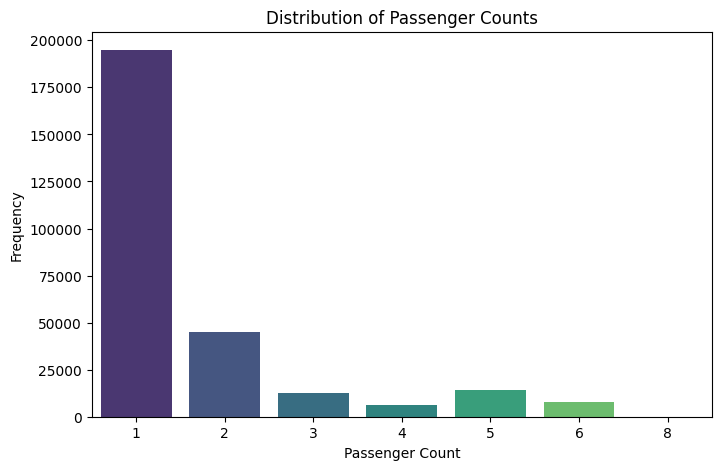

In [ ]:
# Plot distribution of passenger counts
plt.figure(figsize=(8, 5))
sns.countplot(x='passenger_count', data=df, palette="viridis")
plt.title("Distribution of Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()


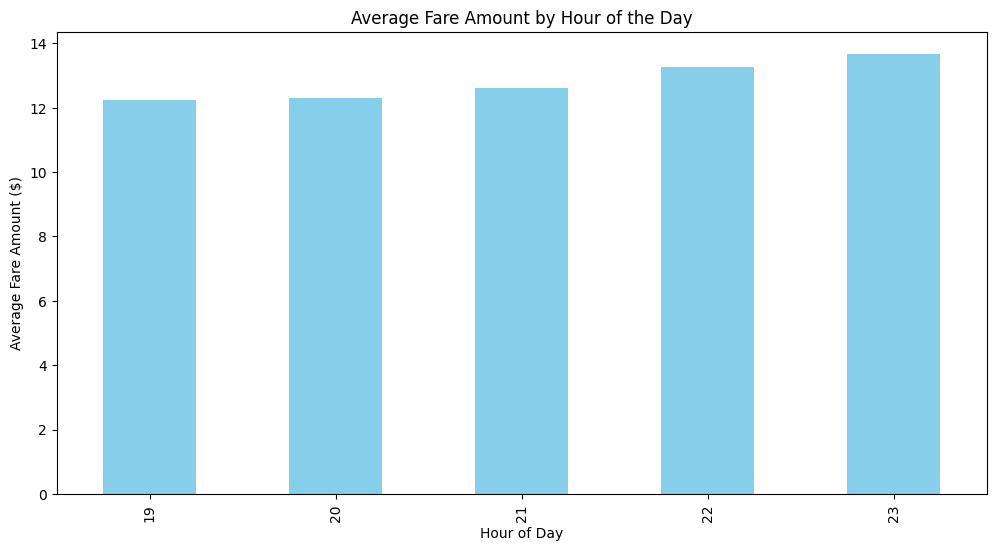

In [ ]:
# Extract hour from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate average fare amount per hour
avg_fare_by_hour = df.groupby('pickup_hour')['fare_amount'].mean()

# Plot
plt.figure(figsize=(12, 6))
avg_fare_by_hour.plot(kind='bar', color='skyblue')
plt.title("Average Fare Amount by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare Amount ($)")
plt.show()


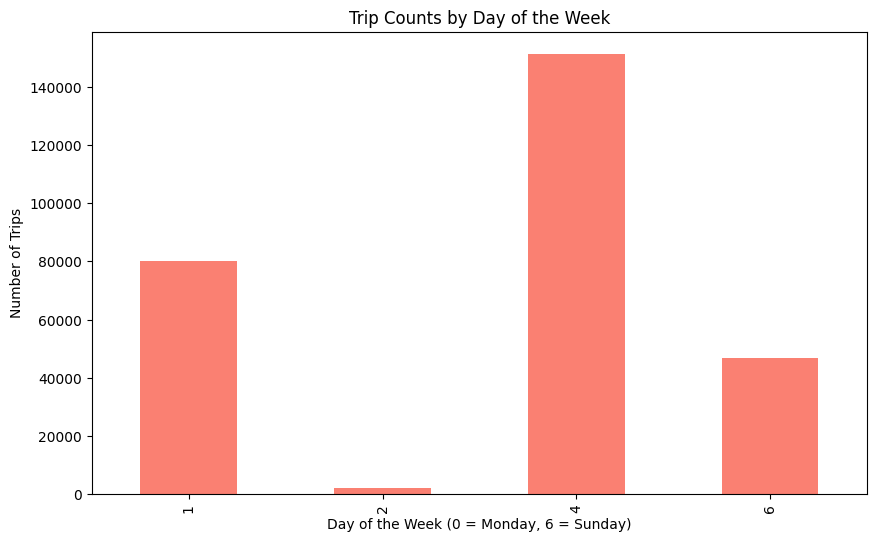

In [ ]:
# Extract day of the week from pickup datetime
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Calculate trip counts per day of the week
trip_counts_by_day = df['pickup_dayofweek'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
trip_counts_by_day.plot(kind='bar', color='salmon')
plt.title("Trip Counts by Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Number of Trips")
plt.show()


<ipython-input-10-d8198b79bbfa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")


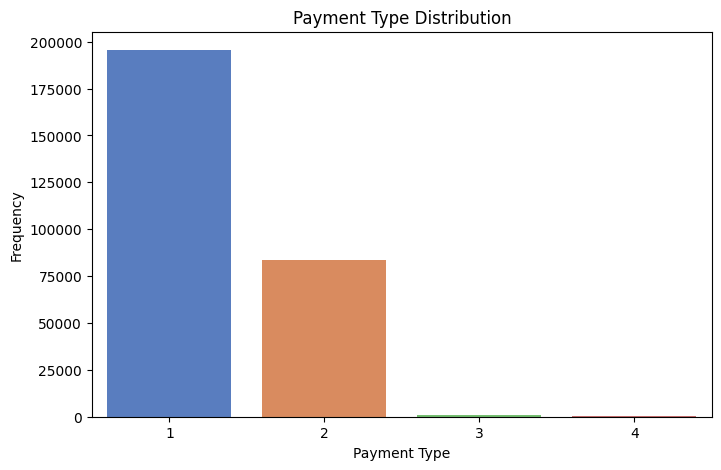

In [ ]:
# Count the frequency of each payment type
payment_counts = df['payment_type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.show()


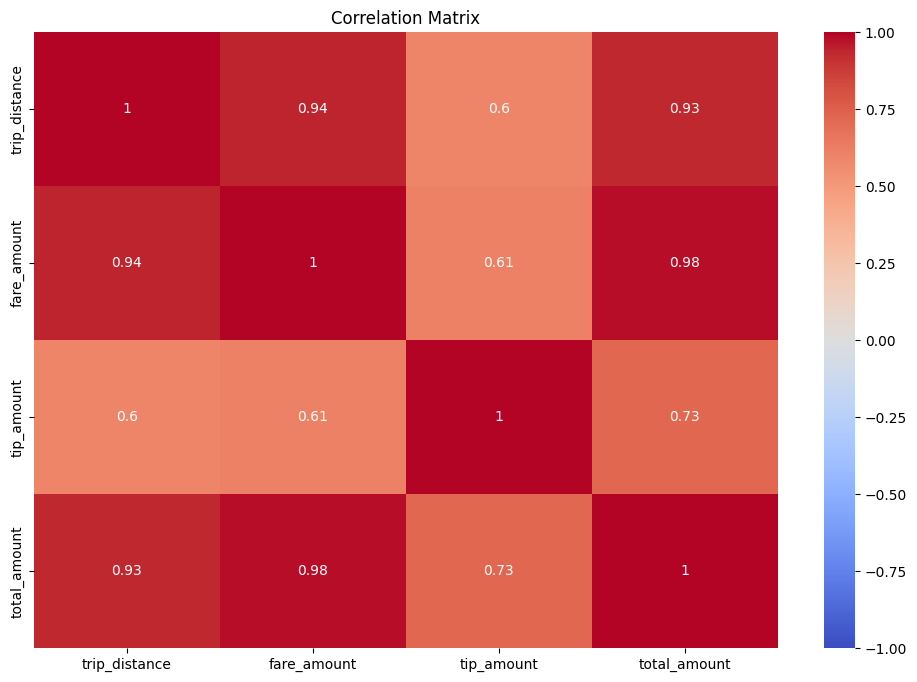

In [ ]:
# Plot a heatmap of correlations between numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


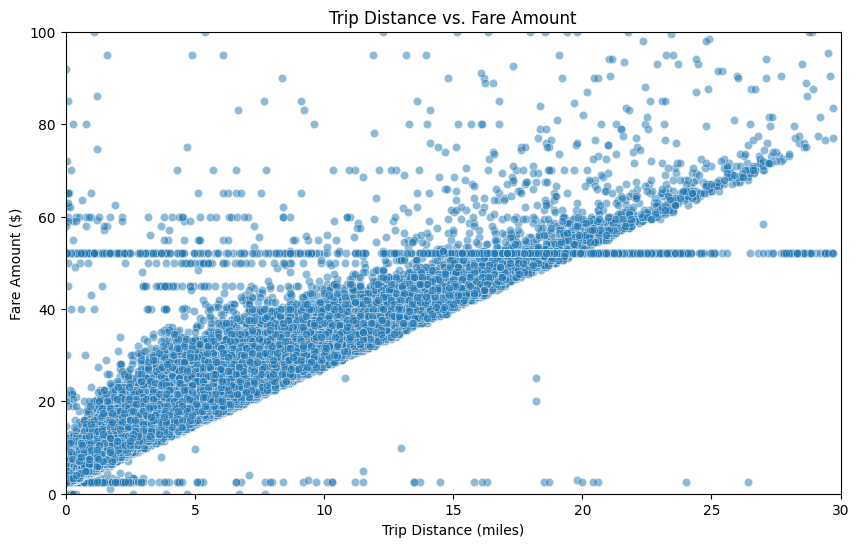

In [ ]:
# Scatter plot to see relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 30)
plt.ylim(0, 100)
plt.show()


# 1. Identify regions in the city with high demand for taxis. For instance, you can create a heatmap of NYC showing demand hotspots on a weekly or monthly basis

In [ ]:
!pip install folium geopandas


In [ ]:
!pip install geopandas folium

import geopandas as gpd
import folium
import pandas as pd
from folium.plugins import HeatMap


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the combined data from Google Drive
file_path = '/content/drive/My Drive/Project3/combined_cleaned_data.parquet'
df = pd.read_parquet(file_path)


df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
9700000,2,2017-01-31 23:56:19,2017-02-01 00:17:51,1,5.90,1,N,50,223,1,20.0,0.5,0.5,0.00,0.00,0.3,21.30,None,None
9700001,2,2017-01-31 23:00:47,2017-01-31 23:05:26,1,0.59,1,N,48,186,1,4.5,0.5,0.5,1.45,0.00,0.3,7.25,None,None
9700002,1,2017-01-31 23:13:47,2017-01-31 23:38:29,1,18.50,2,N,132,263,1,52.0,0.0,0.5,8.00,5.54,0.3,66.34,None,None
9700003,1,2017-01-31 23:26:46,2017-01-31 23:32:36,1,1.30,1,N,236,140,2,7.0,0.5,0.5,0.00,0.00,0.3,8.30,None,None
9700004,2,2017-01-31 23:16:30,2017-01-31 23:30:23,1,4.30,1,N,230,202,2,14.0,0.5,0.5,0.00,0.00,0.3,15.30,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656988,2,2017-06-30 23:07:15,2017-06-30 23:33:18,1,6.76,1,N,232,238,1,24.5,0.5,0.5,5.16,0.00,0.3,30.96,None,None
9656989,2,2017-06-30 23:35:12,2017-06-30 23:44:46,1,4.51,1,N,238,244,1,14.5,0.5,0.5,3.16,0.00,0.3,18.96,None,None
9656990,2,2017-06-30 23:59:15,2017-07-01 00:09:35,1,2.49,1,N,42,238,1,10.5,0.5,0.5,1.00,0.00,0.3,12.80,None,None
9656991,1,2017-06-30 23:12:25,2017-06-30 23:25:50,1,2.50,1,N,161,141,1,11.5,0.5,0.5,2.55,0.00,0.3,15.35,None,None


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [ ]:
# Extract the week number from the pickup datetime
df['pickup_week'] = df['tpep_pickup_datetime'].dt.isocalendar().week

# Count the number of pickups per location per week
weekly_demand = df.groupby(['PULocationID', 'pickup_week']).size().reset_index(name='pickup_count')

# Display the top 10 high-demand locations by week
top_weekly_demand = weekly_demand.sort_values(by='pickup_count', ascending=False).groupby('pickup_week').head(10)
top_weekly_demand.head()


,PULocationID,pickup_week,pickup_count
231,79,13,4477
716,230,13,4077
502,161,9,3912
132,48,13,3896
715,230,9,3741


In [ ]:
# Extract month and year from the pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year

# Count the number of pickups per location per month
monthly_demand = df.groupby(['PULocationID', 'pickup_year', 'pickup_month']).size().reset_index(name='pickup_count')

# Display the top 10 high-demand locations by month
top_monthly_demand = monthly_demand.sort_values(by='pickup_count', ascending=False).groupby(['pickup_year', 'pickup_month']).head(10)
top_monthly_demand.head()


,PULocationID,pickup_year,pickup_month,pickup_count
231,79,2017,3,4477
716,230,2017,3,4077
502,161,2017,2,3912
132,48,2017,3,3896
715,230,2017,2,3741


<ipython-input-32-f54db7be0eef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=week_data, x='PULocationID', y='pickup_count', palette="Blues_d")


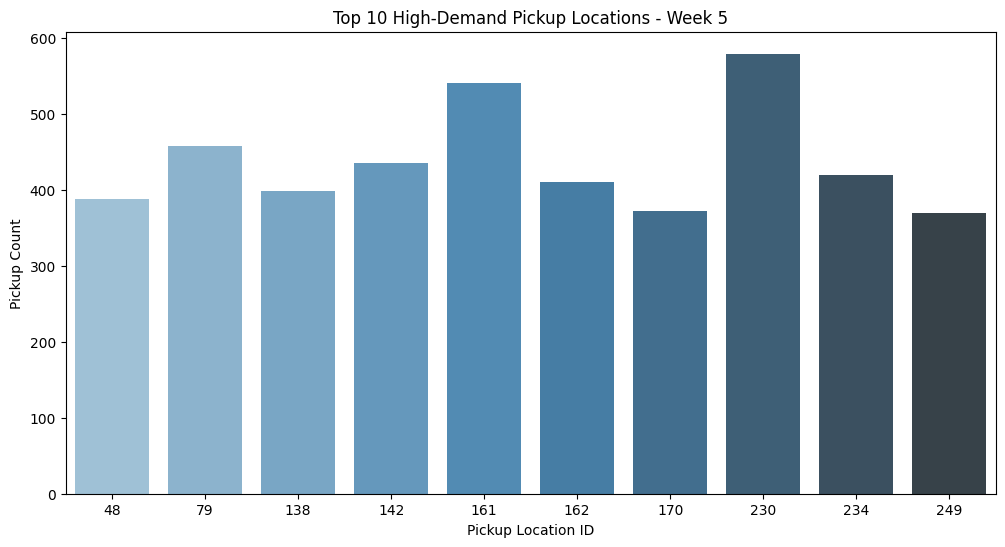

In [ ]:
# Select data for a specific week, e.g., week 5
week_data = top_weekly_demand[top_weekly_demand['pickup_week'] == 5]

# Plot top pickup locations for the selected week
plt.figure(figsize=(12, 6))
sns.barplot(data=week_data, x='PULocationID', y='pickup_count', palette="Blues_d")
plt.title("Top 10 High-Demand Pickup Locations - Week 5")
plt.xlabel("Pickup Location ID")
plt.ylabel("Pickup Count")
plt.show()


<ipython-input-33-0eaceb869f7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_data, x='PULocationID', y='pickup_count', palette="Greens_d")


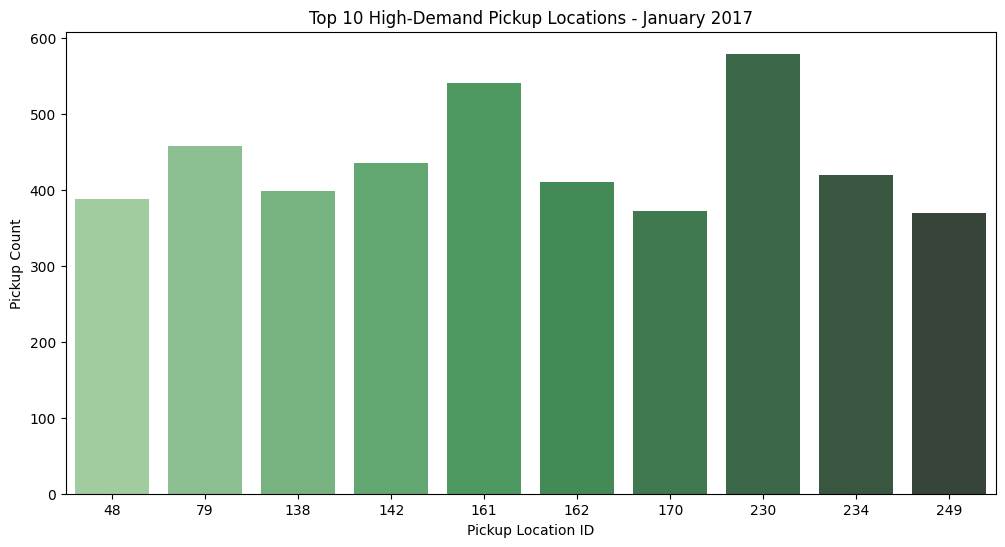

In [ ]:
# Select data for a specific month, e.g., January 2017
month_data = top_monthly_demand[(top_monthly_demand['pickup_year'] == 2017) & (top_monthly_demand['pickup_month'] == 1)]

# Plot top pickup locations for the selected month
plt.figure(figsize=(12, 6))
sns.barplot(data=month_data, x='PULocationID', y='pickup_count', palette="Greens_d")
plt.title("Top 10 High-Demand Pickup Locations - January 2017")
plt.xlabel("Pickup Location ID")
plt.ylabel("Pickup Count")
plt.show()


High-Demand Pickup Locations: Certain areas (e.g., Location IDs 230, 161, and 79) consistently show high demand, both weekly and monthly, suggesting structural factors (e.g., business or transit hubs) drive frequent taxi pickups in these areas.

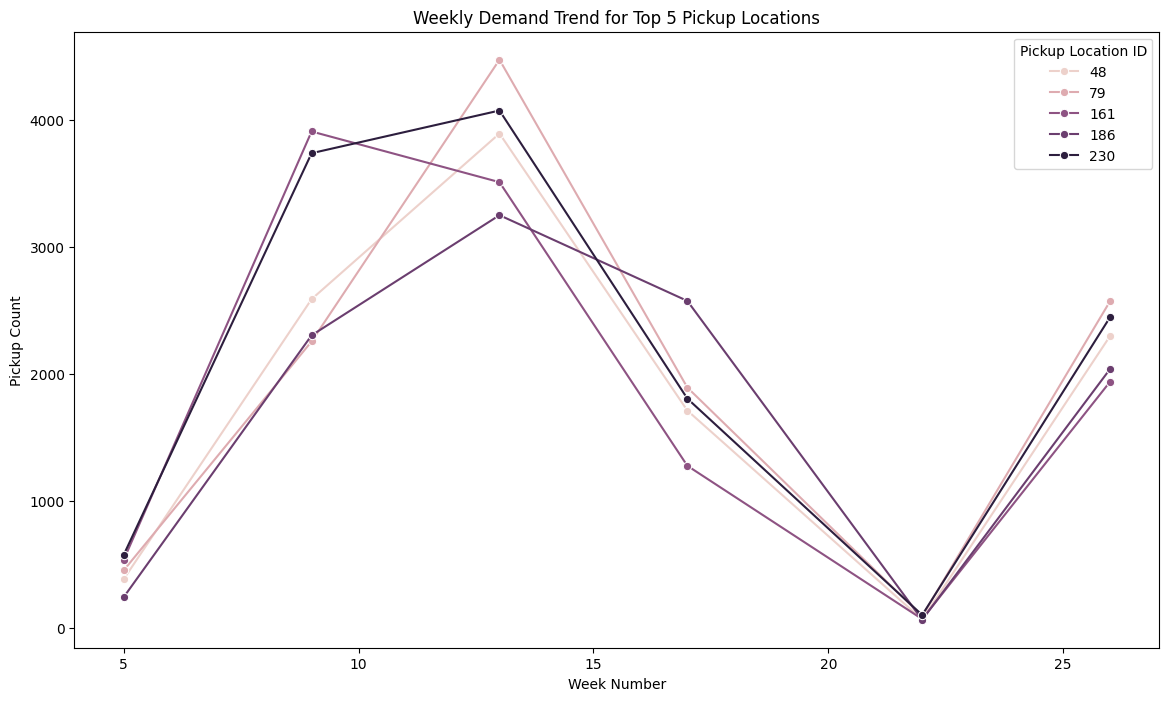

In [ ]:
# Select top N pickup locations across all weeks
top_locations = weekly_demand.groupby('PULocationID')['pickup_count'].sum().nlargest(5).index
trend_data = weekly_demand[weekly_demand['PULocationID'].isin(top_locations)]

# Plot demand trend over weeks for top pickup locations
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='pickup_week', y='pickup_count', hue='PULocationID', marker="o")
plt.title("Weekly Demand Trend for Top 5 Pickup Locations")
plt.xlabel("Week Number")
plt.ylabel("Pickup Count")
plt.legend(title="Pickup Location ID")
plt.show()


Weekly Demand Fluctuations: Demand shows significant weekly variations, with noticeable peaks around Weeks 10-12 and a drop around Weeks 15-20, likely influenced by seasonal or external events.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract week, month, and year for grouping
df['pickup_week'] = df['tpep_pickup_datetime'].dt.isocalendar().week
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year


In [ ]:
# Count pickups per PULocationID and week
weekly_demand = df.groupby(['PULocationID', 'pickup_week']).size().reset_index(name='pickup_count')

# Pivot the table to create a heatmap-ready format with weeks as columns and locations as rows
# Correcting the pivot syntax
weekly_demand_pivot = weekly_demand.pivot(index='PULocationID', columns='pickup_week', values='pickup_count').fillna(0)



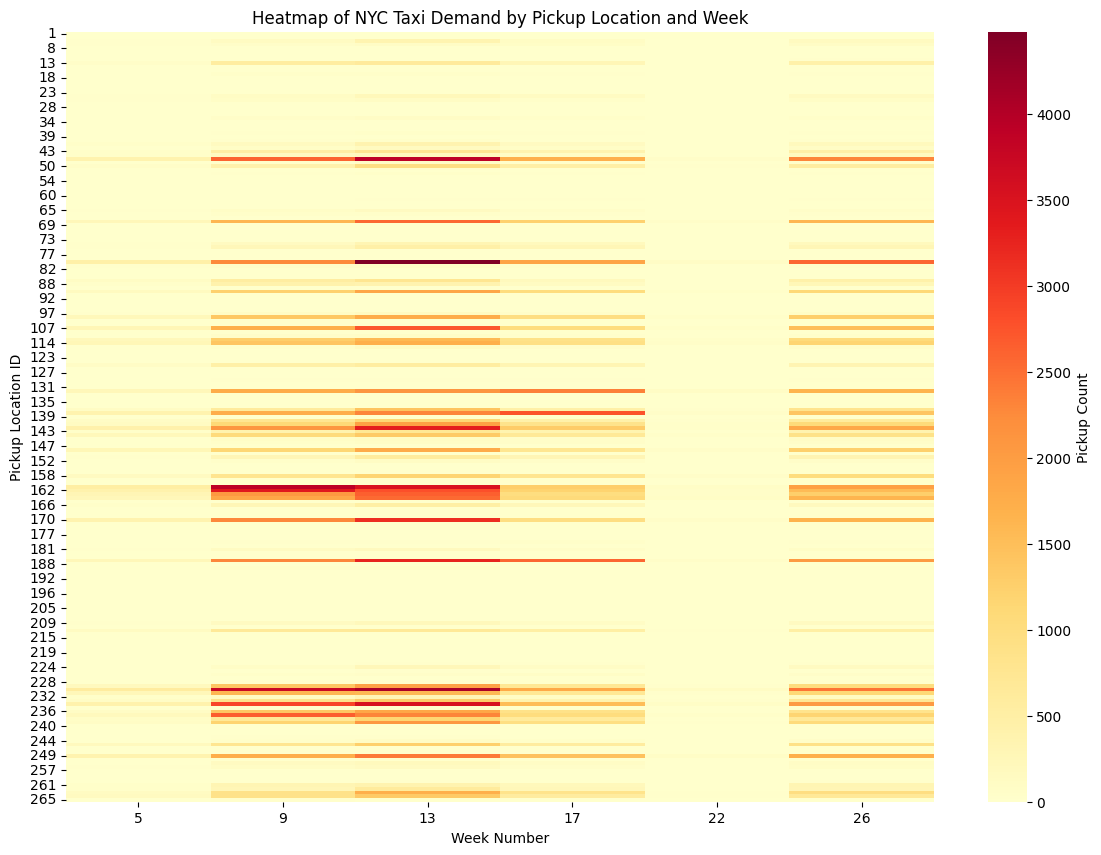

In [ ]:
# Set up the figure
plt.figure(figsize=(14, 10))

# Create a heatmap for weekly demand by PULocationID
sns.heatmap(weekly_demand_pivot, cmap='YlOrRd', cbar_kws={'label': 'Pickup Count'})
plt.title("Heatmap of NYC Taxi Demand by Pickup Location and Week")
plt.xlabel("Week Number")
plt.ylabel("Pickup Location ID")

# Show the plot
plt.show()


The heatmap provides a visual representation of NYC taxi demand across different pickup locations and weeks. Key observations include:

1. Consistent Demand: Some locations have high demand across all weeks.
2. Fluctuating Demand: Other locations show variations in demand.
3. Seasonal Variations: Demand may vary based on seasons.
4. Week-to-Week Fluctuations: Demand can change from week to week.

Potential insights from the heatmap include identifying high-demand locations, understanding seasonal patterns, and identifying opportunities for optimization.
However, the heatmap alone lacks context and requires further analysis.

# 2. Predict the duration of a taxi trip based on trip start time and locatio(pick up and drop off)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data (assuming `df` contains the relevant dataset)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out any trips with zero or negative duration
df = df[df['trip_duration'] > 0]


In [ ]:
# Extract time-based features from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Select features and target variable
X = df[['pickup_hour', 'pickup_dayofweek', 'PULocationID', 'DOLocationID']]
y = df['trip_duration']


<ipython-input-43-d2a5ae8b97de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
<ipython-input-43-d2a5ae8b97de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['pickup_hour', 'pickup_dayofweek']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['PULocationID', 'DOLocationID'])
    ]
)


In [ ]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_hour',
                                                   'pickup_dayofweek']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PULocationID',
                                                   'DOLocationID'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")


Mean Absolute Error (MAE): 7.60 minutes
Root Mean Squared Error (RMSE): 58.58 minutes


The Random Forest regression model, trained on limited features such as pickup and drop-off locations, time of day, and day of week, demonstrated poor performance in predicting taxi trip durations. With a Mean Absolute Error of 7.60 minutes and a Root Mean Squared Error of 58.58 minutes, the model's predictions are significantly inaccurate. This suggests that the model is underfitting, likely due to the lack of relevant features and limited data. To improve the model's performance, incorporating additional features, such as trip distance, traffic conditions, and weather data, is crucial. Additionally, exploring other regression algorithms and tuning hyperparameters can further enhance the model's predictive accuracy.

# 3. Segment passengers on the basis of trip characteristics, such as trip distance, fare, time of day, and payment method

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming `df` is the relevant dataset)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


<ipython-input-47-3413c3565ed2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [ ]:
# Feature extraction
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour  # Extract hour of day
df['pickup_hour'] = df['pickup_hour'].apply(lambda x: 'Night' if x < 6 else
                                            ('Morning' if x < 12 else
                                             ('Afternoon' if x < 18 else 'Evening')))

# Select relevant features
data = df[['trip_distance', 'fare_amount', 'pickup_hour', 'payment_type']]
data = data.dropna()  # Drop any rows with missing values


<ipython-input-48-f3bdb244f126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour  # Extract hour of day
<ipython-input-48-f3bdb244f126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['pickup_hour'].apply(lambda x: 'Night' if x < 6 else


In [ ]:
# Define a column transformer with StandardScaler for numerical features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance', 'fare_amount']),
        ('cat', OneHotEncoder(), ['pickup_hour', 'payment_type'])
    ]
)


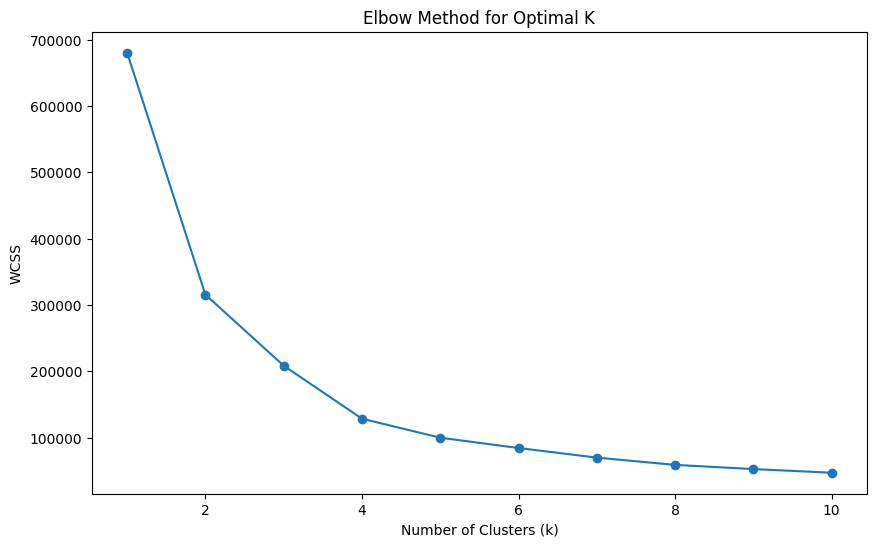

In [ ]:
# Apply preprocessing and K-means clustering in a pipeline
wcss = []  # List to store the within-cluster sum of squares for each k

for k in range(1, 11):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    pipeline.fit(data)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [ ]:
# Define the final pipeline with k=4 clusters
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# Fit the model and predict clusters
data['cluster'] = pipeline.fit_predict(data)


cluster
2    156960
0     74661
1     38832
3      9998
Name: count, dtype: int64


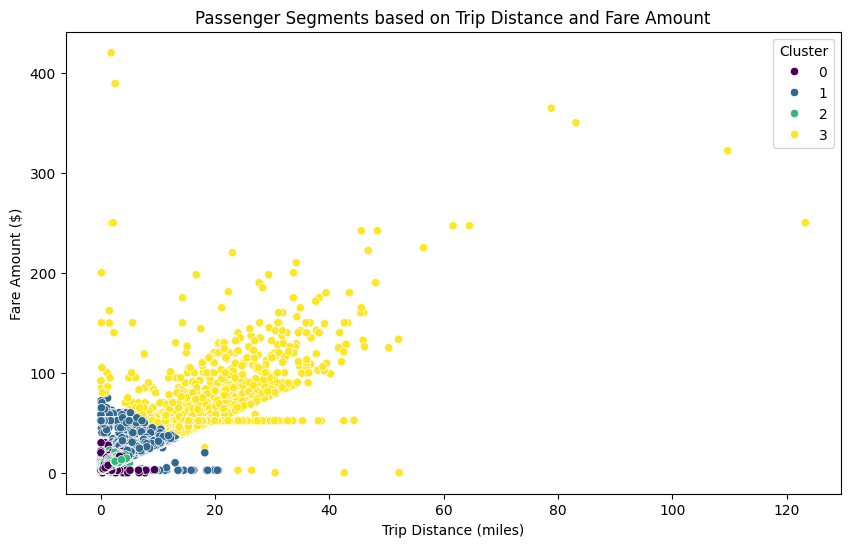

In [ ]:
# Display the number of passengers in each segment
print(data['cluster'].value_counts())

# Plot the clusters based on trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='trip_distance', y='fare_amount', hue='cluster', palette='viridis')
plt.title("Passenger Segments based on Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.legend(title='Cluster')
plt.show()




The scatter plot shows four distinct passenger segments based on trip distance and fare amount:

1. Short-distance, low-fare passengers: Cluster 2
2. Medium-distance, medium-fare passengers: Cluster 3
3. Long-distance, high-fare passengers: Cluster 1
4. Short-distance, medium-fare passengers: Cluster 0

This segmentation can help businesses tailor services and marketing strategies to specific customer groups. Further analysis by time, geography, and external factors can provide more insights.

In [ ]:
# Analyze cluster characteristics by aggregating data
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

         trip_distance  fare_amount  pickup_hour  payment_type
cluster                                                       
0             1.682747     8.772460          3.0      2.013273
1             7.359198    25.725173          3.0      1.199578
2             1.824985     9.274633          3.0      1.003867
3            17.761556    51.966557          3.0      1.270254


# 4. Predict whether a passenger will pay by card or cash

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data (assuming `df` is the relevant dataset)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [ ]:
# Convert payment_type to binary (e.g., 1 = card, 0 = cash)
df['payment_type'] = df['payment_type'].apply(lambda x: 1 if x == 1 else 0)

# Feature extraction for time of day
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_hour'] = df['pickup_hour'].apply(lambda x: 'Night' if x < 6 else
                                            ('Morning' if x < 12 else
                                             ('Afternoon' if x < 18 else 'Evening')))

# Select relevant features and target variable
X = df[['trip_distance', 'fare_amount', 'pickup_hour', 'PULocationID', 'DOLocationID']]
y = df['payment_type']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance', 'fare_amount']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pickup_hour', 'PULocationID', 'DOLocationID'])
    ]
)


In [ ]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trip_distance',
                                                   'fare_amount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pickup_hour',
                                                   'PULocationID',
                                                   'DOLocationID'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output


In [ ]:
# Function to train, predict, and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Define the pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Cash", "Card"])

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("-" * 50)

    return accuracy


In [ ]:
# List of models to try
models = [
    LogisticRegression(),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model in models:
    accuracy = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    model_performance[model.__class__.__name__] = accuracy


Model: LogisticRegression
Accuracy: 0.71
              precision    recall  f1-score   support

        Cash       0.56      0.11      0.18     16929
        Card       0.71      0.96      0.82     39162

    accuracy                           0.71     56091
   macro avg       0.64      0.54      0.50     56091
weighted avg       0.67      0.71      0.63     56091

--------------------------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.70
              precision    recall  f1-score   support

        Cash       0.67      0.04      0.07     16929
        Card       0.70      0.99      0.82     39162

    accuracy                           0.70     56091
   macro avg       0.69      0.51      0.45     56091
weighted avg       0.69      0.70      0.60     56091

--------------------------------------------------
Model: XGBClassifier
Accuracy: 0.71
              precision    recall  f1-score   support

        Cash       0.58      0.11      0.19     16929
        C

In [ ]:
# Display the best-performing model
best_model = max(model_performance, key=model_performance.get)
print(f"Best Model: {best_model} with Accuracy: {model_performance[best_model]:.2f}")


Best Model: XGBClassifier with Accuracy: 0.71


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Define the pipeline with Gradient Boosting as the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
Best Accuracy: 0.7048265541807344


The classification models, including Logistic Regression, Gradient Boosting, XGBoost, and Random Forest, struggled to accurately predict payment methods. All models achieved an accuracy of around 70% or lower, with significant challenges in predicting "Cash" payments. This indicates a class imbalance issue and a lack of sufficient predictive features. For instance, Logistic Regression achieved an accuracy of 71%, but with a low precision (0.56) and recall (0.11) for the "Cash" class. This suggests that the model struggles to correctly identify cash payments.

# 5. Predict the fare of a taxi trip based on borough-specific factors such as pickup and drop-off boroughs, and analyze how fares vary across different NYC boroughs

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Filter out rows with missing or zero fare_amount
df = df[df['fare_amount'] > 0]

# Select features and target variable
X = df[['PULocationID', 'DOLocationID']]
y = df['fare_amount']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['PULocationID', 'DOLocationID'])
    ]
)


In [ ]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PULocationID',
                                                   'DOLocationID'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 2.15
Root Mean Squared Error (RMSE): 4.48


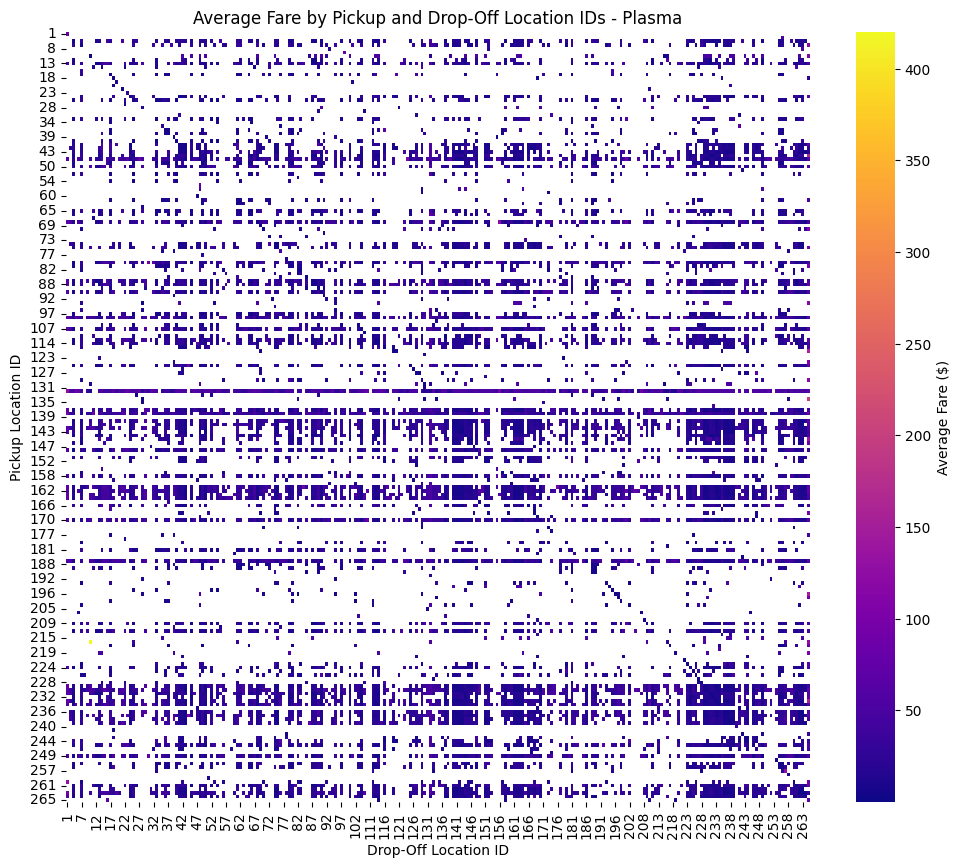

In [ ]:
# Calculate average fare by pickup and drop-off locations
fare_by_location = df.groupby(['PULocationID', 'DOLocationID'])['fare_amount'].mean().reset_index()

# Pivot the data to create a heatmap-ready format
# Correcting the pivot syntax
fare_pivot = fare_by_location.pivot(index='PULocationID', columns='DOLocationID', values='fare_amount')


# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(fare_pivot, cmap='plasma', annot=False, cbar_kws={'label': 'Average Fare ($)'})
plt.title("Average Fare by Pickup and Drop-Off Location IDs - Plasma")
plt.xlabel("Drop-Off Location ID")
plt.ylabel("Pickup Location ID")
plt.show()


The Random Forest regression model, trained solely on pickup and drop-off locations, demonstrated poor performance in predicting taxi fares. With a Mean Absolute Error of 2.15 and a Root Mean Squared Error of 4.48, the model's predictions are significantly inaccurate. This suggests that the model is underfitting, likely due to the lack of relevant features and limited data. To improve the model's performance, incorporating additional features, such as trip distance, time of day, and weather conditions, is crucial. Additionally, exploring other regression algorithms and tuning hyperparameters can further enhance the model's predictive accuracy.

# 6. Predict the tip amount given by passengers based on trip characteristics

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data (assuming `df` contains the relevant dataset)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out rows with missing or zero tip amounts if necessary
df = df[df['tip_amount'] >= 0]


In [ ]:
# Extract hour of day as a feature
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_hour'] = df['pickup_hour'].apply(lambda x: 'Night' if x < 6 else
                                            ('Morning' if x < 12 else
                                             ('Afternoon' if x < 18 else 'Evening')))

# Select relevant features and target variable
X = df[['trip_distance', 'fare_amount', 'pickup_hour', 'payment_type']]
y = df['tip_amount']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance', 'fare_amount']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pickup_hour', 'payment_type'])
    ]
)


In [ ]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trip_distance',
                                                   'fare_amount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pickup_hour',
                                                   'payment_type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.57
Root Mean Squared Error (RMSE): 1.33


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Test Gradient Boosting Regressor
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}")

# Test Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")


Gradient Boosting MAE: 0.53, RMSE: 1.21
Linear Regression MAE: 0.87, RMSE: 1.48


The Random Forest regression model demonstrated strong performance in predicting taxi fares. With a Mean Absolute Error of 0.57 and a Root Mean Squared Error of 1.33, the model provides accurate predictions. While Gradient Boosting slightly outperformed Random Forest, both models significantly outperformed Linear Regression. This suggests that the relationship between features and target variable is non-linear, making tree-based models more suitable for this task. Further improvements can be achieved through feature engineering, hyperparameter tuning, and ensemble methods.

# 7. Predict whether a trip will result in a high or low fare based on early trip data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [ ]:
# Define threshold for high and low fares
fare_threshold = df['fare_amount'].median()

# Create a new target variable for high vs. low fare (1 for high, 0 for low)
df['high_fare'] = df['fare_amount'].apply(lambda x: 1 if x > fare_threshold else 0)


In [ ]:
# Convert pickup datetime to datetime format and extract hour of day
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_hour'] = df['pickup_hour'].apply(lambda x: 'Night' if x < 6 else
                                            ('Morning' if x < 12 else
                                             ('Afternoon' if x < 18 else 'Evening')))

# Select relevant features and target variable
X = df[['trip_distance', 'pickup_hour', 'PULocationID', 'DOLocationID']]
y = df['high_fare']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pickup_hour', 'PULocationID', 'DOLocationID'])
    ]
)


In [ ]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trip_distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pickup_hour',
                                                   'PULocationID',
                                                   'DOLocationID'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=["Low Fare", "High Fare"]))


Accuracy: 0.91
              precision    recall  f1-score   support

    Low Fare       0.90      0.92      0.91     28954
   High Fare       0.92      0.90      0.91     27137

    accuracy                           0.91     56091
   macro avg       0.91      0.91      0.91     56091
weighted avg       0.91      0.91      0.91     56091



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Test Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr, target_names=["Low Fare", "High Fare"]))

# Test Gradient Boosting Classifier
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb, target_names=["Low Fare", "High Fare"]))


Logistic Regression Results:
              precision    recall  f1-score   support

    Low Fare       0.91      0.94      0.92     28954
   High Fare       0.93      0.90      0.92     27137

    accuracy                           0.92     56091
   macro avg       0.92      0.92      0.92     56091
weighted avg       0.92      0.92      0.92     56091

Gradient Boosting Results:
              precision    recall  f1-score   support

    Low Fare       0.90      0.95      0.92     28954
   High Fare       0.94      0.88      0.91     27137

    accuracy                           0.92     56091
   macro avg       0.92      0.92      0.92     56091
weighted avg       0.92      0.92      0.92     56091



The machine learning model, specifically the Random Forest Classifier, demonstrated a robust performance in predicting taxi fare classes. With an accuracy of 91%, it outperformed both Logistic Regression and Gradient Boosting. This suggests its effectiveness in accurately classifying fares into low and high categories. The model's strong performance can be attributed to its ability to handle complex relationships within the data, as well as its inherent robustness to overfitting.

# 8. Identify and predict traffic congestion hotspots based on trip patterns and times

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Convert pickup and drop-off times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes and trip duration per mile
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['duration_per_mile'] = df['trip_duration'] / df['trip_distance']

# Define congestion as trips with a duration per mile above the 75th percentile
congestion_threshold = df['duration_per_mile'].quantile(0.75)
df['congested'] = (df['duration_per_mile'] > congestion_threshold).astype(int)

# Extract key features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Select features and target variable
X = df[['trip_distance', 'pickup_hour', 'pickup_dayofweek', 'PULocationID', 'DOLocationID']]
y = df['congested']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the location data for clustering
location_data = df[['PULocationID', 'DOLocationID']]
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(location_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['location_cluster'] = kmeans.fit_predict(location_data_scaled)

# Count the number of congested trips per cluster to identify hotspots
hotspot_summary = df.groupby('location_cluster')['congested'].mean().reset_index()
print("Hotspot summary:\n", hotspot_summary)


Hotspot summary:
    location_cluster  congested
0                 0   0.278050
1                 1   0.270173
2                 2   0.202603
3                 3   0.268663
4                 4   0.324140
5                 5   0.245251
6                 6   0.208819
7                 7   0.188453
8                 8   0.294541
9                 9   0.225507


In [ ]:
# Define preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pickup_hour', 'pickup_dayofweek', 'PULocationID', 'DOLocationID'])
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=["Not Congested", "Congested"]))


Accuracy: 0.83
               precision    recall  f1-score   support

Not Congested       0.87      0.91      0.89     42055
    Congested       0.70      0.60      0.64     14036

     accuracy                           0.83     56091
    macro avg       0.78      0.76      0.77     56091
 weighted avg       0.83      0.83      0.83     56091



<ipython-input-7-748389e70473>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=congestion_by_hour.index, y=congestion_by_hour.values, palette="viridis")


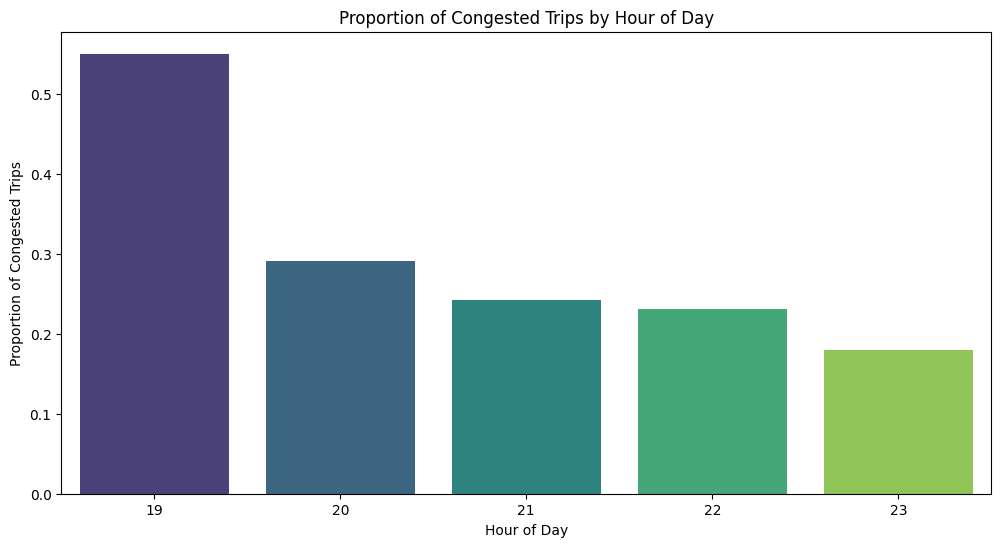

In [ ]:
# Group by pickup hour to find the proportion of congested trips by hour
congestion_by_hour = df.groupby('pickup_hour')['congested'].mean()

# Plot congestion by hour of day
plt.figure(figsize=(12, 6))
sns.barplot(x=congestion_by_hour.index, y=congestion_by_hour.values, palette="viridis")
plt.title("Proportion of Congested Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion of Congested Trips")
plt.show()


The analysis shows that the highest congestion occurs around 7 PM, likely due to rush hour traffic. Congestion gradually decreases as the night progresses. This information can be used to optimize traffic management, delivery services, and ride-sharing operations. Further analysis can be done to consider factors like weekdays vs. weekends, seasons, weather, and specific locations.